# Test Field

In [1]:
import datetime
import re
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

In [2]:
import final_func as fn
import importlib
importlib.reload(fn)

<module 'final_func' from '/Users/andrewmo/Documents/Docs - Jupiter/Projects/Class Individuals/2022Spring_Finals/final_func.py'>

In [3]:
# Load data
pit = pd.read_csv('data/pit_stops.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')
lap = pd.read_csv("data/lap_times.csv")

In [4]:
# Process the data files
merge_df = fn.merge_data([pit, results, status])
merge_df = fn.process_data(merge_df)
df_dict = fn.pit_stop_group(merge_df)

In [5]:
lap_df =fn.lap_data_process(results, lap)

In [40]:
df = lap_df
threshold=0.05

rank_list = []
gap_list = []
df = df.assign(rank='', gap='')
highest_rank = df['positionOrder'].max()
position_list = df['positionOrder'].tolist()
laptime_list = df['lap_time_STD'].tolist()

for position in position_list:
    if position <= (highest_rank / 2):
        rank_list.append('High Rank')
    else:
        rank_list.append('Low Rank')
for item in laptime_list:
    if item <= 70:
        if item <= 1:
            div = 1
        else:
            div = (item-1)//5 + 1
        gap_list.append(5*div)

        if div == 0: print(item)
    else:
        gap_list.append('NA')

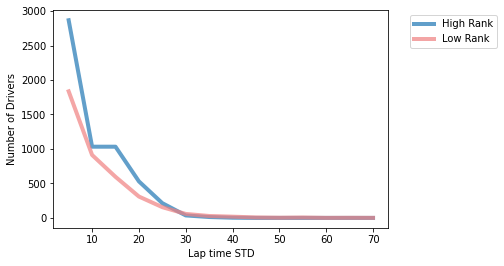

----------------------------------------------------------------------------------------
P-value between high ranking drivers and low ranking drivers is 3.4344815744795804e-07.
----------------------------------------------------------------------------------------
Reject H0. There is a difference.


In [41]:
df['rank'] = rank_list
df['gap'] = gap_list
df = df[df['gap'] != "NA"]
df_groupby = df.groupby(['rank', 'gap'], as_index=False)['driverId'].count()
pivot = pd.pivot_table(data=df_groupby, index=["gap"], columns=['rank'], aggfunc='sum', fill_value=0)
pivot.plot(linewidth=4, alpha=0.7, color=['tab:blue', 'lightcoral'])
plt.legend(labels=['High Rank', 'Low Rank'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel('Number of Drivers')
plt.xlabel('Lap time STD')
plt.show()
pvalue = mannwhitneyu(df[df['rank'] == "High Rank"]['lap_time_STD'],
                      df[df['rank'] == "Low Rank"]['lap_time_STD']).pvalue
print('-' * 88)
print('P-value between high ranking drivers and low ranking drivers is {}.'.format(pvalue))
print('-' * 88)
if pvalue < threshold:
    print("Reject H0.", "There is a difference.")
else:
    print("H0 cannot be rejected")

In [32]:
df['gap']

14      25.0
17      20.0
11      20.0
8       20.0
3       20.0
        ... 
9771    20.0
9770    15.0
9755    20.0
9761    25.0
9756    20.0
Name: gap, Length: 9664, dtype: object